In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

/tmp/ipython-input-805325473.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.460485,16.528267,16.137910,16.152011,147611217
1,2012-01-04,16.531481,16.580214,16.341993,16.451085,114989399
2,2012-01-05,16.302166,16.424863,16.233396,16.379347,131808205
3,2012-01-06,16.079781,16.326659,16.074090,16.305631,108119746
4,2012-01-09,15.398016,16.005072,15.367588,15.992701,233776981
...,...,...,...,...,...,...
3259,2024-12-16,197.520325,199.992315,193.483395,193.737577,32248600
3260,2024-12-17,196.483688,202.225105,196.055084,197.889141,24129500
3261,2024-12-18,189.536179,198.048619,188.668992,196.194623,27638400


In [5]:
ma_100_days = data.Close.rolling(100).mean()

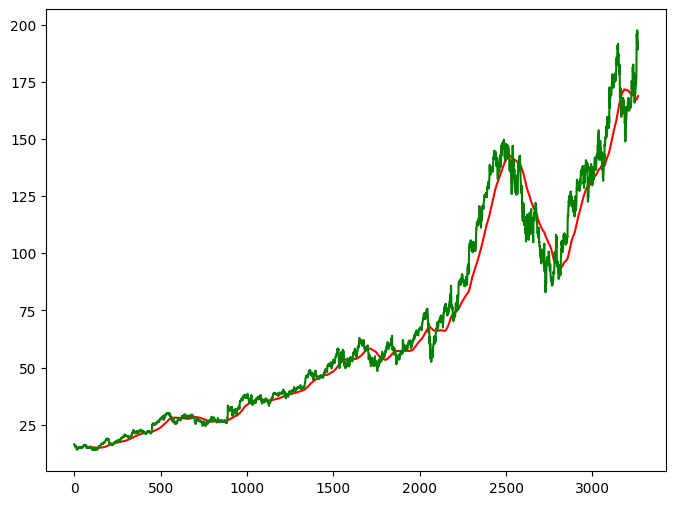

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

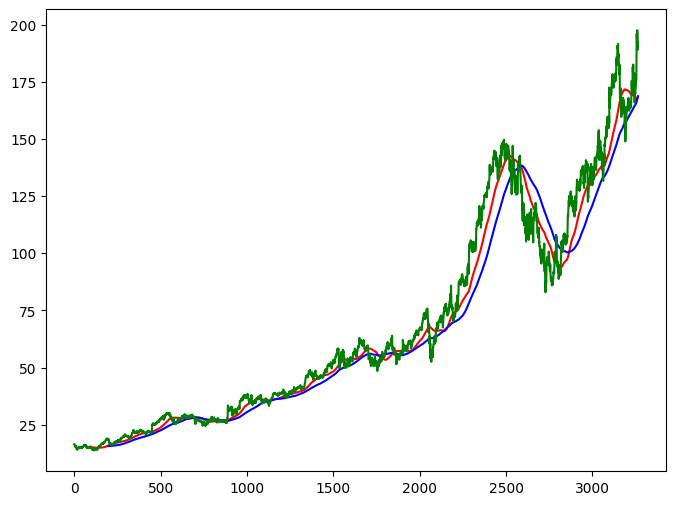

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)


# Model training

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2611

In [13]:
data_test.shape[0]

653

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - loss: 0.0536
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0049
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0055
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0053
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0039
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0033
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0035
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0033
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0035
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0033
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0030
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0029
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0033
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0027
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0027
Epo

# **Evaluation**

In [22]:
past_100_days = data_train.tail(100)
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

scaler = MinMaxScaler(feature_range=(0,1))
data_test_scale = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)


Now, let's make predictions on the test data and inverse transform them back to the original scale.

In [23]:
y_predict = model.predict(x_test)

scale = 1/scaler.scale_[0]
y_predict = y_predict * scale
y_test = y_test * scale


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

# Calculate percentage metrics
mean_y_test = np.mean(y_test)
rmse_percentage = (rmse / mean_y_test) * 100
mae_percentage = (mae / mean_y_test) * 100

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Root Mean Squared Error (RMSE) as percentage of mean actual value: {rmse_percentage:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Error (MAE) as percentage of mean actual value: {mae_percentage:.2f}%")

Mean Squared Error (MSE): 54.40
Root Mean Squared Error (RMSE): 7.38
Root Mean Squared Error (RMSE) as percentage of mean actual value: 14.95%
Mean Absolute Error (MAE): 6.07
Mean Absolute Error (MAE) as percentage of mean actual value: 12.30%


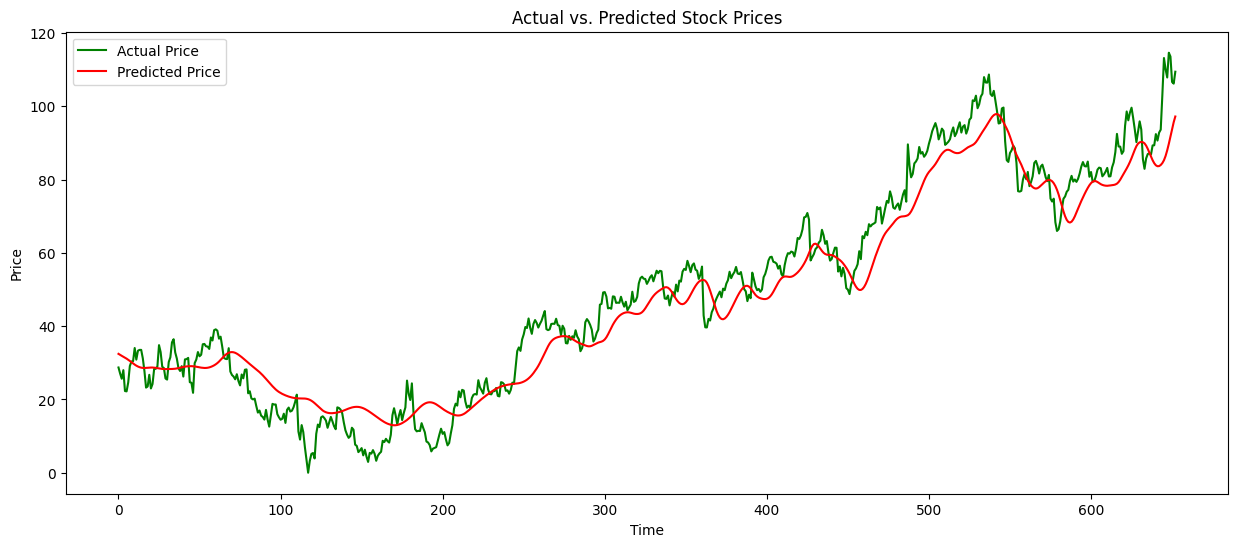

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, 'g', label='Actual Price')
plt.plot(y_predict, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

### **Save the Model**

Saving the trained model allows us to reload it later for making new predictions or further analysis without needing to retrain it from scratch.

In [29]:
model.save('stock_model.keras')
print("Model saved as stock_model.keras")

Model saved as stock_model.keras
